# My Solution for Titanic Competition  

Thanks to "A Data Science Framework:To Achieve 99% Accuracy" on Kaggle. A fantastic tutorial! 

1. Define the Problem 
2. Gather the Data
3. Prepare Data for Consumption
4. Perform Exploratory Analysis
5. Model Data
6. Validate and Implement Data Model
7. Optimize and Strategize

### 1. Define the problem: 
Develop an algorithm to predict the survival outcome of passengers on the Titanic.  
It's a Binary classification problem and python is used in this solution.

### 2. Gather the data
The dataset is provided by kaggle with train and test data.

### 3. Prepare data for consumption

#### 3.1 Import Libraries
The following code is written in Python 3.6.

In [1]:
#load packages
import sys
print(f'Python version: {sys.version}')

import pandas as pd
print(f'pandas version: {pd.__version__}')

import matplotlib
print(f'matplotlib version: {matplotlib.__version__}')

import numpy as np
print(f'numpy version: {pd.__version__}')

import scipy as sp
print(f'scipy version: {sp.__version__}')

import IPython
from IPython import display # pretty printing of dataframes in Jupyter notebook
print(f'IPython version: {IPython.__version__}')

import sklearn #collection of machine learning algorithms
print(f'scikit-learn version: {sklearn.__version__}')

import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.1.2
numpy version: 0.22.0
scipy version: 1.0.0
IPython version: 6.2.1
scikit-learn version: 0.19.1
-------------------------


In [2]:
#input data files are available in the "./input/" directory
from subprocess import check_output
print('Input data files:')
#print(check_output(['ls','input']).decode('utf8'))
#print(check_output(["ls","./input"]).decode("utf8"))

Input data files:


#### Load data modeling libraries
I will use the scikit-learn library to develpe my machine learning algorithms.

In [38]:
#common Modeling algorithms
from sklearn import svm,tree,linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process
from xgboost import XGBClassifier

#common Modeling helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [4]:
#configure visualization defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#### 3.2  Meet the data
Here I will first load in the data, use the info() and sample() function to get a quick and dirty overview of variable datatypes(i.e. qualitative vs quantitative)  


In [5]:
#load the data
#this is the raw dataset, I will split the train set into train and test data in following 
data_raw = pd.read_csv('./input/train.csv')

#the dataset provided is the validtion file for competition submission
data_val = pd.read_csv('./input/test.csv')

#make a copy of original data to play around
data1 = data_raw.copy(deep = True)  #deep = true is default, modifications will not affect the original object

#put two datasets together for preprocessing
data_total = [data1,data_val]

#preview data
print(data_raw.info())

data_raw.sample(10) #see 10 random samples in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S


#### Variables summary
1. **PassengerId** Passenger Id
2. The **Survived** varibale is our outcome or dependent variable(or lable).
3. **Pclass** 	
4. 
5. 
6 .
7. 

In [110]:
print('Missing data in training set:\n', data1.isnull().sum())
print('-'*10)

print('Missing data in testing set:\n', data_val.isnull().sum())
print('-'*10)

data1.describe(include='all')

Missing data in training set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Missing data in testing set:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


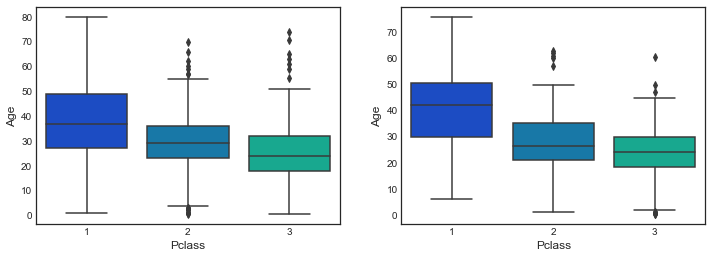

In [14]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(x='Pclass',y='Age',data = data1, palette='winter', ax=ax[0])
sns.boxplot(x='Pclass',y='Age',data = data_val, palette='winter', ax=ax[1])

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [7]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data1['Age'] = data1[['Age','Pclass']].apply(impute_age,axis=1)

In [10]:
data_val['Age'] = data_val[['Age','Pclass']].apply(impute_age,axis=1)

In [11]:
data_total = [data1,data_val]

In [12]:
#impute missing data in training and testing set
for dataset in data_total:
#    dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age, axis=1)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)

In [13]:
#delete irrelavant features 
drop_column = ['PassengerId','Cabin','Ticket']
data1.drop(drop_column, axis = 1, inplace=True)
data_val.drop(drop_column, axis = 1, inplace=True)
print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [14]:
##create: new features
for dataset in data_total:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch'] +1
    
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] >1] =0
#    dataset['Title'] = dataset['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]

In [15]:
#review dataset again
data1.info()
data_val.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null object
FamilySize    418 non-null int64
IsAlone       418 non-null int64
dtypes: float64(2), 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
853,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,39.4000,S,2,0
315,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,7.8542,S,1,1
625,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,32.3208,S,1,1
491,0,3,"Windelov, Mr. Einar",male,21.0,0,0,7.2500,S,1,1
832,0,3,"Saad, Mr. Amin",male,24.0,0,0,7.2292,C,1,1
228,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,13.0000,S,1,1
805,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,7.7750,S,1,1
212,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,7.2500,S,1,1
683,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,46.9000,S,8,0
727,1,3,"Mannion, Miss. Margareth",female,24.0,0,0,7.7375,Q,1,1


In [16]:
#for training set
sex = pd.get_dummies(data1['Sex'],drop_first=True)
embark = pd.get_dummies(data1['Embarked'],drop_first=True)

In [17]:
#for testing set
sex_t= pd.get_dummies(data_val['Sex'],drop_first=True)
embark_t = pd.get_dummies(data_val['Embarked'],drop_first=True)

In [18]:
data1.drop(['Sex','Embarked','Name'],axis=1,inplace=True)

In [19]:
data1 = pd.concat([data1,sex,embark],axis=1)

In [20]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,male,Q,S
0,0,3,22.0,1,0,7.2500,2,0,1,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,1,0,1


In [21]:
data_val.drop(['Sex','Embarked','Name'],axis=1,inplace=True)
data_val = pd.concat([data_val,sex_t,embark_t],axis=1)

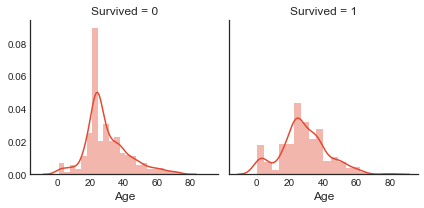

In [44]:
#check the distribution of age in training set
sns.FacetGrid(data = data1, col='Survived').map(sns.distplot, 'Age')

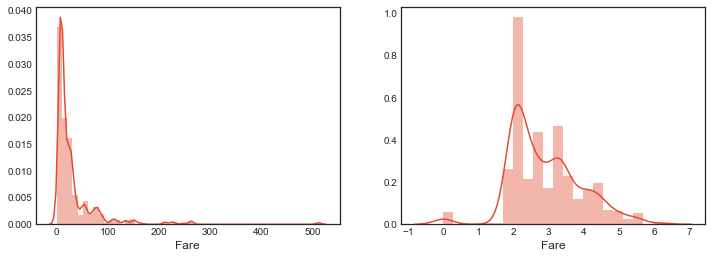

In [42]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.distplot(data1['Fare'], ax=ax[0])
sns.distplot(data1['Fare'].apply(lambda i:np.log(i) if i>0 else 0), ax=ax[1])

In [22]:
data1['Fare'] = data1['Fare'].apply(lambda i:np.log(i) if i>0 else 0)

In [48]:
#clean test data
#data_val.head()
sex1 = pd.get_dummies(data_val['Sex'],drop_first=True)
embark1 = pd.get_dummies(data_val['Embarked'],drop_first=True)

In [49]:
data_val.drop(['Ticket'],axis=1,inplace=True)

In [50]:
data_val = pd.concat([data_val,sex,embark],axis=1)

In [23]:
data_val['Fare'] = data_val['Fare'].apply(lambda i:np.log(i) if i>0 else 0)

In [70]:
data_val.drop('is_train',axis=1,inplace=True)

In [71]:
data_val.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,male,Q,S
0,3,34.5,0,0,2.057860,1,1,1,1,0
1,3,47.0,1,0,1.945910,2,0,0,0,1
2,2,62.0,0,0,2.270836,1,1,1,1,0
3,3,27.0,0,0,2.159003,1,1,1,0,1
4,3,22.0,1,1,2.508582,3,0,0,0,1


In [66]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,male,Q,S
0,0,3,22.0,1,0,1.981001,2,0,1,0,1
1,1,1,38.0,1,0,4.266662,2,0,0,0,0
2,1,3,26.0,0,0,2.070022,1,1,0,0,1
3,1,1,35.0,1,0,3.972177,2,0,0,0,1
4,0,3,35.0,0,0,2.085672,1,1,1,0,1


In [68]:
#save cleaned dataset
data1.to_csv('train_cleaned.csv',index=False)
data_val.to_csv('test_cleaned1.csv',index_label=False)

In [73]:
data_val.to_csv('test_cleaned.csv',index_label=True)

In [130]:
X_train = data1.drop('Survived',axis=1)
Y_train = data1['Survived']
X_test = data_val

In [39]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

In [131]:
rf = RandomForestClassifier(random_state= 7)

In [132]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [133]:
rf_random = model_selection.RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter = 100, cv =5, n_jobs=-1, random_state=7)

In [134]:
rf_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 10]},
          pre_dispatch='2*n_jobs', random_state=7, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [135]:
#print the best param
print(rf_random.best_params_)

{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}


In [136]:
param_grid = {
    'max_depth': [30,50,70,90],
    #'max_features': [2,3,5],
    'min_samples_leaf': [1,2,5,10],
    'min_samples_split': [2,5,10],
    'n_estimators': [100,500,1000,1600]
}

In [137]:
#on gridsearch
rfc = RandomForestClassifier()
grid_search = model_selection.GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)

In [138]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [30, 50, 70, 90], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 500, 1000, 1600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [139]:
print(grid_search.best_params_)

{'max_depth': 70, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [90]:
#rf_m = RandomForestClassifier(random_state=7, oob_score=True, n_jobs=-1, n_estimators=100, max_depth=90, min_samples_leaf=2,
                             min_samples_split=2)
#rf_m.fit(X_train,Y_train)
#0.8922442718818905

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=7, verbose=0, warm_start=False)

In [140]:
rf_m = RandomForestClassifier(random_state=7, oob_score=True, n_jobs=-1, n_estimators=500, max_depth=70, min_samples_leaf=2,
                             min_samples_split=2)
rf_m.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=7, verbose=0, warm_start=False)

In [141]:
y_pred1 = rf_m.predict(X_train)
print(metrics.roc_auc_score(Y_train,y_pred1))

0.8966302367941713


In [70]:
test_Id = X_test['PassengerId']

In [72]:
#X_test.dropna(inplace=True)

In [144]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
male          418 non-null uint8
Q             418 non-null uint8
S             418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [147]:
Y_pred = rf_m.predict(X_test)

In [148]:
len(Y_pred)

418

In [152]:
type(Y_pred)

numpy.ndarray

In [149]:
result = test_Id.to_frame('PassengerId')

In [154]:
result.head()

,PassengerId
0,892.0
1,893.0
2,894.0
3,895.0
4,896.0


In [162]:
t1 = pd.DataFrame(data = Y_pred)

In [167]:
res = pd.concat([result,pd.DataFrame(Y_pred)],axis =1, ignore_index=True)

In [168]:
res.head()

,0,1
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0


In [169]:
res.columns = ['PassengerId','Survived']

In [171]:
res.dropna(inplace=True)

In [172]:
res.shape

(418, 2)

In [173]:
res.Survived = res.Survived.astype(int)

In [174]:
res.PassengerId = res.PassengerId.astype(int)

In [175]:
res.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [176]:
res.to_csv('my_prediction.csv',index=False)

In [181]:
type(res['Survived'][0])

numpy.int32

In [165]:
gender = pd.read_csv('./input/gender_submission.csv')

In [168]:
type(gender['Survived'][0])

numpy.int64

In [28]:
data_val.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,male,Q,S
0,3,34.5,0,0,2.057860,1,1,1,1,0
1,3,47.0,1,0,1.945910,2,0,0,0,1
2,2,62.0,0,0,2.270836,1,1,1,1,0
3,3,27.0,0,0,2.159003,1,1,1,0,1
4,3,22.0,1,1,2.508582,3,0,0,0,1


In [69]:
t_train = data1.drop('Survived',axis=1).copy()
t_test = data_val.copy()

In [34]:
#add lable to two datasets
t_train['is_train'] = 1
t_test['is_train'] = 0

In [35]:
#combine two datasets
df_combine = pd.concat([t_train,t_test],axis=0,ignore_index=True)


In [36]:

y=df_combine['is_train'].values
x = df_combine.drop('is_train',axis=1).values

trn, tst = t_train.values, t_test.values

In [40]:
#build and test a classifier
m = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5)
predictions = np.zeros(y.shape) #creating an empty prediction array

In [42]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=100)
for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
 xtrain, xtest = x[train_idx], x[test_idx]
 ytrain, ytest = y[train_idx], y[test_idx]
 
 m.fit(xtrain, ytrain)
 probs = m.predict_proba(xtest)[:, 1] #calculating the probability
 predictions[test_idx] = probs

In [51]:
print('ROC-AUC for train and test distributions:', metrics.roc_auc_score(y, predictions))

ROC-AUC for train and test distributions: 0.5207980925684275


In [60]:
#feature importance
importances = m.feature_importances_

In [62]:
indices = np.argsort(importances)[::-1]

In [64]:
t_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
       'male', 'Q', 'S', 'is_train'],
      dtype='object')

In [61]:
importances

array([0.03338426, 0.4070124 , 0.07499338, 0.03132256, 0.33563412,
       0.02059986, 0.02727454, 0.01845992, 0.02167738, 0.02964159])

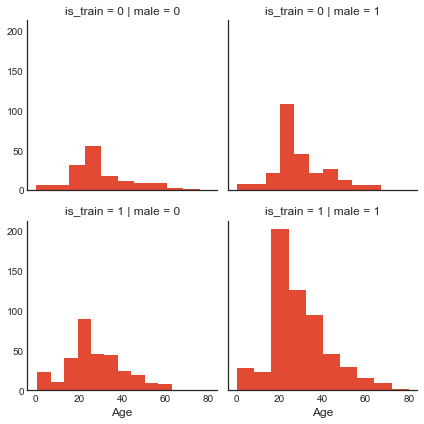

In [54]:
#check the difference between trainnign and testing dataset
g= sns.FacetGrid(df_combine,col='male',row='is_train')
g=g.map(plt.hist,'Age')

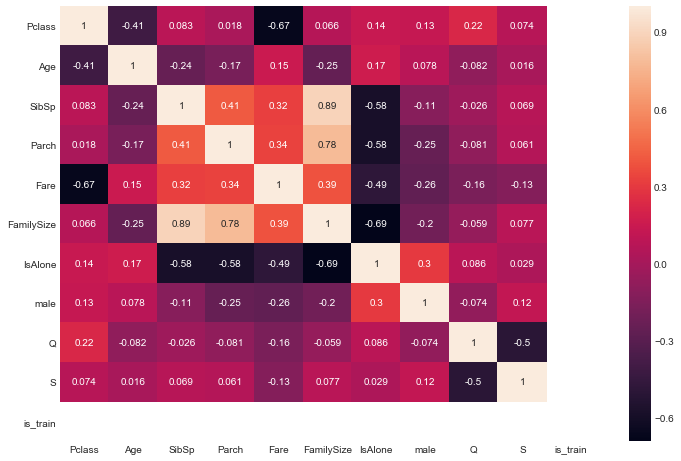

In [57]:
#check the difference between trainnign and testing dataset
sns.heatmap(df_combine[df_combine.is_train==1].corr(),annot=True)

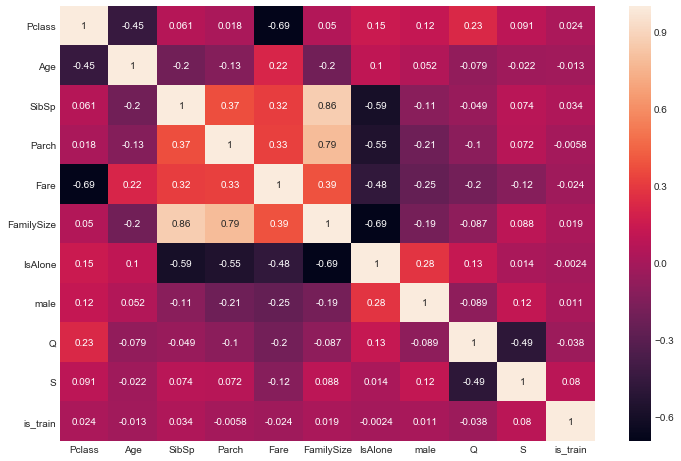

In [59]:
#check the difference between trainnign and testing dataset
sns.heatmap(df_combine.corr(),annot=True)